## 셀프 스터디
- 선별진료소 지도 타입별 구분
- 데이터 시각화
- 치킨집
- 알라딘 베스트셀러 기초

In [1]:
# 라이브러리
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MiniMap
import pandas as pd
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt

In [2]:
# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path ).get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   

### 선별진료소 지도 타입별 구분

In [3]:
# 서울역 위도, 경도
seoul_station = [37.5536387,126.9671714]
map=folium.Map(location=seoul_station, zoom_start=12)

raw=pd.read_excel("./data/선별진료소.xlsx")

# 미니맵과 클러스터
MiniMap().add_to(map)
marker_cluster=MarkerCluster().add_to(map)

# 마커하기
for i in raw.index:
    lat=raw.loc[i, "y"] # 위도 : 남북
    long=raw.loc[i, "x"] # 경도 : 동서
    name=raw.loc[i, "place_name"]
    call=raw.loc[i, "대표 전화번호"]

    location=[lat, long]

    folium.Marker(location, tooltip=name, 
                  popup=call).add_to(marker_cluster)
map

In [4]:
raw=pd.read_excel("./data/선별진료소(승차검진).xlsx")
raw.head(1)

,시도,시군구,의료기관명,주소,평일 운영시간,토요일 운영시간,일요일/공휴일\n운영시간,대표 전화번호,관할보건소,관할보건소 전화번호,place_name,type,x,y
0,대구,남구,영남대학교 병원,대구 남구 현충로 170,08:30 ~ 13:00,미운영,미운영,053-620-3177,대구광역시 남구보건소,0536643697,영남대학교 병원,승차검진,128.58513,35.847505


In [5]:
raw=pd.read_excel("./data/임시선별검사소.xlsx")
raw.head(1)

,시도,시군구,임시선별검사소,주소,평일 운영시간,토요일 운영시간,일요일/공휴일\n운영시간,전화번호,관할보건소,보건소연락처,place_name,type,x,y
0,경기도,수원시 장안구,장안구 통합청사 지상주차장,경기도 수원시 장안구 송원로 101,09:00 ~ 17:00\n(점심·소독) 12:00 ~ 14:00,09:00 ~ 13:00,09:00 ~ 13:00,031-228-5062,수원시 장안구,NaN,장안구 통합청사 지상주차장,임시선별검사소,127.010314,37.30403


In [6]:
# 서울역 위도, 경도
seoul_station = [37.5536387,126.9671714]
map=folium.Map(location=seoul_station, zoom_start=12)

# 미니맵과 클러스터
MiniMap().add_to(map)
marker_cluster=MarkerCluster().add_to(map)

# 마커하기
# 선별진료소
raw=pd.read_excel("./data/선별진료소.xlsx")
for i in raw.index:
    lat=raw.loc[i, "y"] # 위도 : 남북
    long=raw.loc[i, "x"] # 경도 : 동서
    name=raw.loc[i, "place_name"]
    call=raw.loc[i, "대표 전화번호"]

    location=[lat, long]

    folium.Marker(location, tooltip=name+" : 선별진료소", popup=call,
                  icon=folium.Icon(color="orange")).add_to(marker_cluster)

# 선별진료소 승차검진
raw=pd.read_excel("./data/선별진료소(승차검진).xlsx")
for i in raw.index:
    lat=raw.loc[i, "y"] # 위도 : 남북
    long=raw.loc[i, "x"] # 경도 : 동서
    name=raw.loc[i, "place_name"]
    call=raw.loc[i, "관할보건소 전화번호"]

    location=[lat, long]

    folium.Marker(location, tooltip=name+" : 선별진료소(승차검진)", popup=call,
                  icon=folium.Icon(color="blue")).add_to(map)

# 임시선별검사소
raw=pd.read_excel("./data/임시선별검사소.xlsx")
for i in raw.index:
    lat=raw.loc[i, "y"] # 위도 : 남북
    long=raw.loc[i, "x"] # 경도 : 동서
    name=raw.loc[i, "place_name"]
    call=raw.loc[i, "전화번호"]

    location=[lat, long]

    folium.Marker(location, tooltip=name, popup=call,
                  icon=folium.Icon(color="green")).add_to(marker_cluster)
    
map

In [7]:
map.save("./result/COVID_Clinic_GEO.html")

### 데이터 시각화

In [8]:
# 레스토랑 데이터
raw=sns.load_dataset("tips")
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<AxesSubplot:>

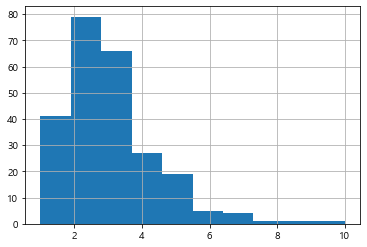

In [10]:
raw["tip"].hist() # matplotlib

<AxesSubplot:xlabel='tip', ylabel='Count'>

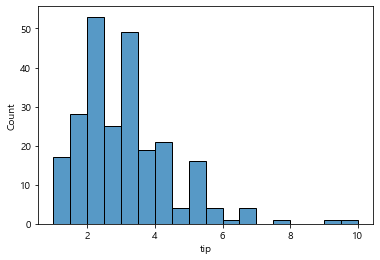

In [11]:
sns.histplot(raw["tip"]) # seaborn

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

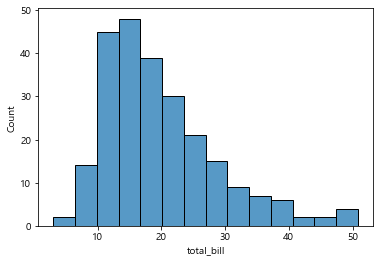

In [12]:
sns.histplot(raw["total_bill"])

### 치킨집

In [13]:
shop_raw=pd.read_excel("./data/chicken/상가업소업력현황_경상북도.xlsx")
shop_raw.head()

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,경상북도,포항시,관광/여가/오락,놀이/여가/취미,3.0,1.0,5.0,5.0,2.0
1,경상북도,포항시,관광/여가/오락,요가/단전/마사지,4.0,3.0,19.0,33.0,17.0
2,경상북도,포항시,관광/여가/오락,전시/관람,2.0,1.0,3.0,10.0,6.0
3,경상북도,포항시,관광/여가/오락,무도/유흥/가무,14.0,7.0,39.0,233.0,102.0
4,경상북도,포항시,관광/여가/오락,PC/오락/당구/볼링등,19.0,15.0,89.0,77.0,42.0


In [14]:
population_raw = pd.read_excel("./data/chicken/주민등록인구및세대현황_월간.xlsx",
                               header = 2, thousands = ',') # header 2부터
population_raw.head()

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9765623,4263868,2.29,4773899,4991724,0.96
1,서울특별시 종로구 (1111000000),153065,73735,2.08,74825,78240,0.96
2,서울특별시 중구 (1114000000),125725,61502,2.04,61947,63778,0.97
3,서울특별시 용산구 (1117000000),228999,108974,2.10,110640,118359,0.93
4,서울특별시 성동구 (1120000000),308221,137209,2.25,151359,156862,0.96


### 알라딘

In [15]:
# 라이브러리
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

# chromedriver 버전 업데이트
chromedriver_autoinstaller.install()

# 브라우저 열기
browser = webdriver.Chrome() # 컴퓨터용 브라우저

# 알라딘 베스트셀러 열기
url="https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1"
browser.get(url)

time.sleep(1)

# 찍기
html=browser.page_source
soup=BeautifulSoup(html, "html.parser")

# 수집
book_list=soup.select("div.ss_book_box")
len(book_list)

50

In [16]:
# 책 제목
title=soup.select("a.bo3")
len(title)

50

In [17]:
title=title[0].text.strip()
title

'전지적 독자 시점 Part 1 : 제4의 벽 에디션 세트 - 전8권'

In [18]:
# 가격
cost=soup.select("span.ss_p2 > b > span")
len(cost)

50

In [19]:
cost=cost[0].text.strip() + " 원"
cost

'115,200 원'

In [20]:
results=[]

for book in book_list:
    title=book.select("a.bo3")[0].text.strip()
    cost=book.select("span.ss_p2 > b > span")[0].text.strip() + " 원"
    results.append([title, cost])
results[:5]

[['전지적 독자 시점 Part 1 : 제4의 벽 에디션 세트 - 전8권', '115,200 원'],
 ['월간순정 노자키 군 13 한정판 (82p 소책자 포함)', '12,600 원'],
 ['마법천자문 52', '10,800 원'],
 ['흔한남매 9', '12,150 원'],
 ['한 게으른 시인의 이야기', '11,700 원']]

In [21]:
# 책 제목 클릭
title_btn=browser.find_elements_by_css_selector("a.bo3")[0]
title_btn.click()

<ipython-input-21-913f83a8bf51>:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title_btn=browser.find_elements_by_css_selector("a.bo3")[0]


In [22]:
html=browser.page_source
soup=BeautifulSoup(html, "html.parser")

time.sleep(1)

In [23]:
writer, publisher=soup.select("a.Ere_sub2_title")
print(writer.text)
print(publisher.text)

싱숑
비채


In [24]:
# 라이브러리
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

# chromedriver 버전 업데이트
chromedriver_autoinstaller.install()

# 브라우저 열기
browser = webdriver.Chrome() # 컴퓨터용 브라우저

# 알라딘 베스트셀러 열기
url="https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1"
browser.get(url)

time.sleep(1)

# 찍기
html=browser.page_source
soup=BeautifulSoup(html, "html.parser")

# 수집
book_list=soup.select("div.ss_book_box")[:3]
i=0

for book in tqdm(book_list):
    # 책 기본 정보 수집
    title=book.select("a.bo3")[0].text.strip()
    cost=book.select("span.ss_p2 > b > span")[0].text.strip() + " 원"
    
    # 책 제목 클릭
    title_btn=browser.find_elements_by_css_selector("a.bo3")[i]
    title_btn.click()
    
    html=browser.page_source
    soup=BeautifulSoup(html, "html.parser")

    time.sleep(1)
    
    # 책 상세 정보 수집
    writer, publisher=soup.select("a.Ere_sub2_title")
    results.append([title, cost, writer.text, publisher.text])

    # 이전 페이지로 이동
    browser.back()
    i+=1
results

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]<ipython-input-24-4fd7fa6255f1>:35: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title_btn=browser.find_elements_by_css_selector("a.bo3")[i]
 33%|████████████████████████████                                                        | 1/3 [00:18<00:36, 18.13s/it]


KeyboardInterrupt: 